## 1.Import Libraries

In [167]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import ReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")


## 2.Exploratory Data Analys

### 2.1 Import DataSet

In [168]:
# Reading the data
df_weather = pd.read_csv('./data/weatherAUS.csv')
df_weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [169]:
df_weather.shape

(145460, 23)

In [170]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

> Bộ dữ liệu này chứa khoảng 10 năm quan sát thời tiết hàng ngày từ nhiều địa điểm trên khắp nước Úc bao gồm 145460 và 23 thuộc tính

> RainTomorrow là biến mục tiêu cần cho bài toán phân loại.

### 2.2 Structure of dataset

In [171]:
# Checking the data types
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### 2.3 Summary of statistic

In [172]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### 2.4. Data Visualization

#### 2.4.1. Biểu đồ thể hiện mối quan hệ giữa hai biến liên tục

> Thể hiện mối quan hệ giữ "Evaporation" và "Sunshine", "Rainfall" và "Cloud3mp"

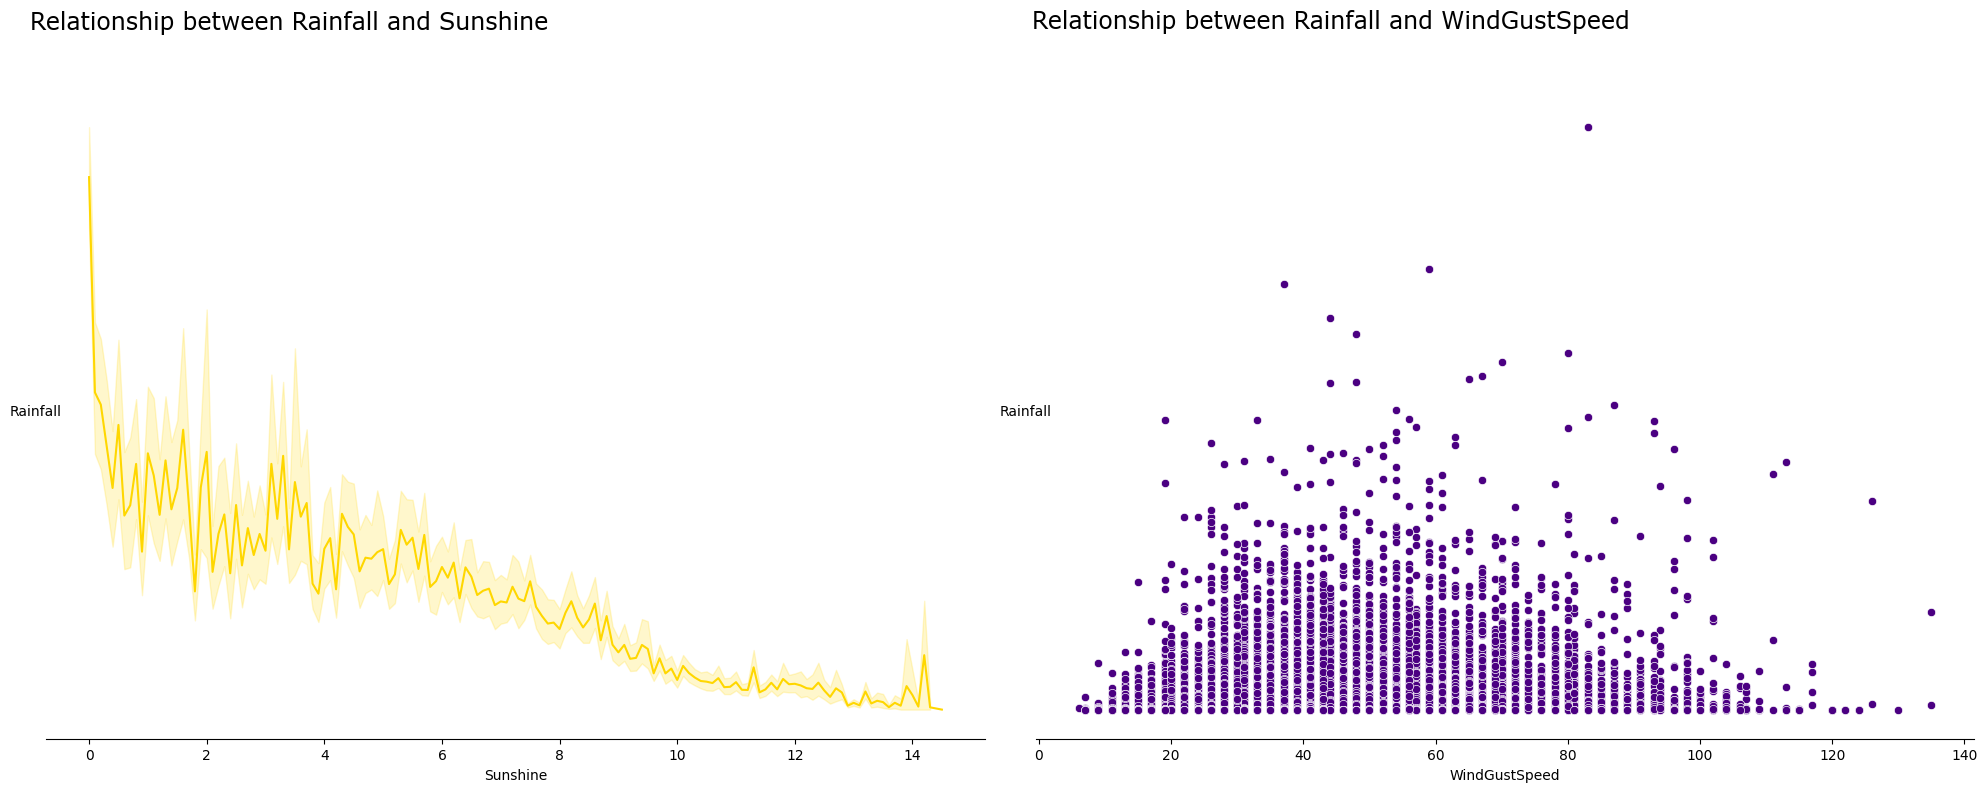

In [173]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=17,fontweight='normal', fontfamily='Verdana')

sns.lineplot(data=df_weather,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=df_weather,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

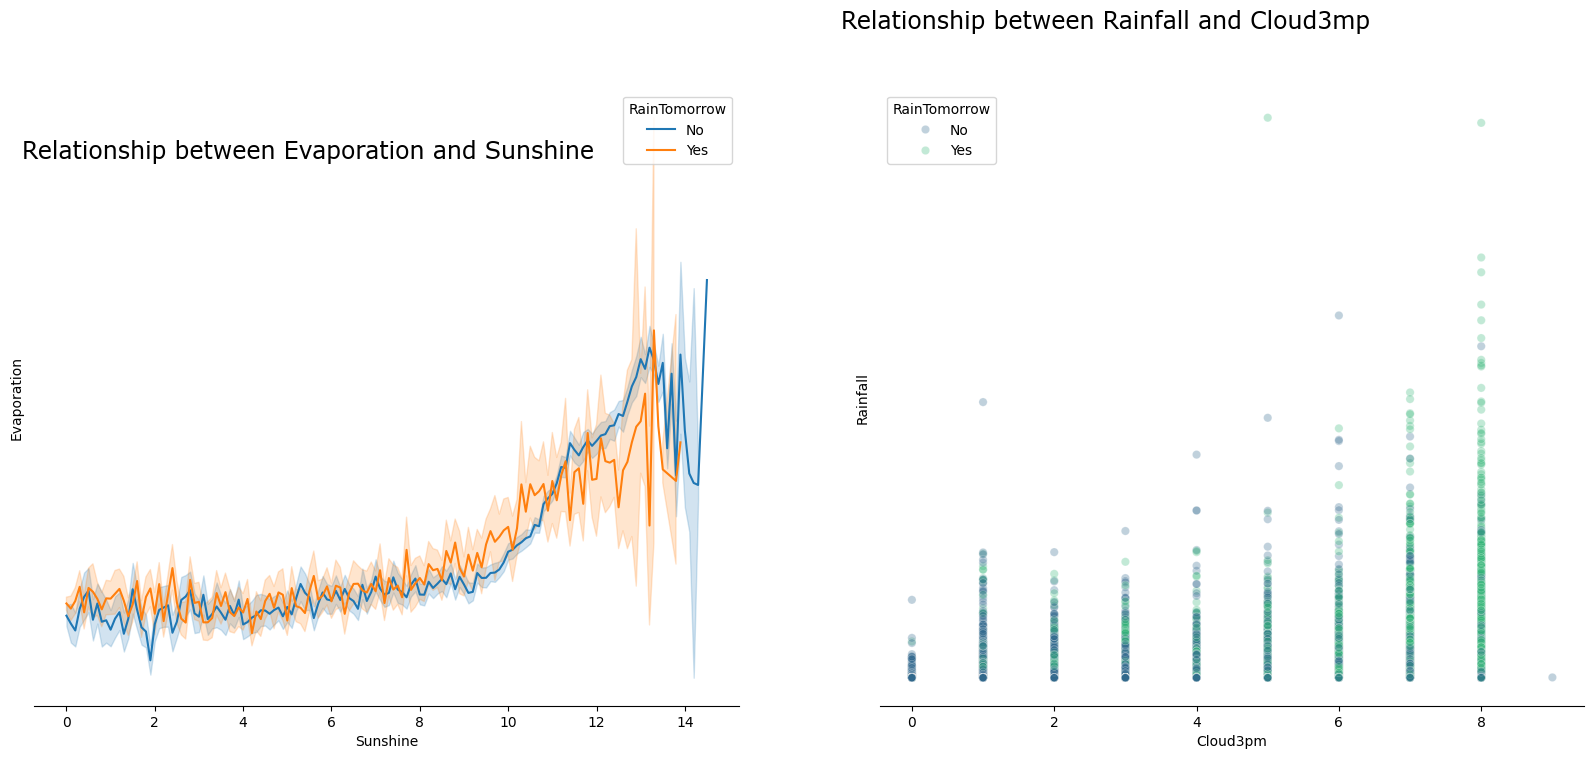

In [174]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=17,fontweight='normal', fontfamily='Verdana')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=df_weather,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=df_weather,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.3)

#### 2.4.2. Biểu đồ Histogram

> Biểu đồ histogram "Rainfall" với bins = 100

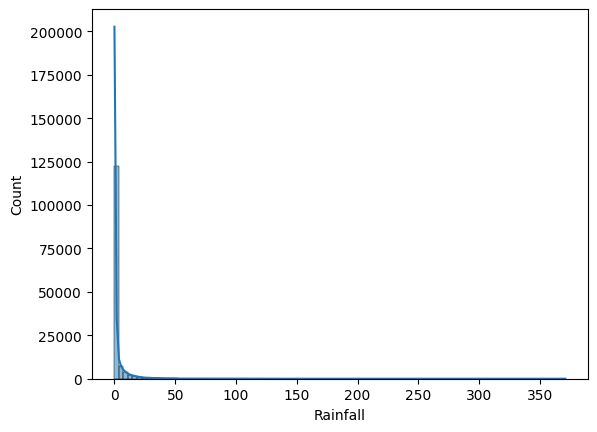

In [175]:

sns.histplot(data = df_weather, x = 'Rainfall', bins = 100, kde = True);

> Biểu đồ histogram "MaxTemp" với bins = 100

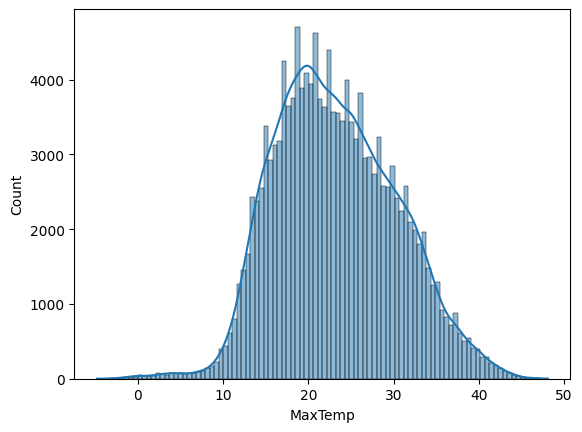

In [176]:
sns.histplot(data = df_weather, x = 'MaxTemp', bins = 100, kde = True);

> biểu đồ boxplot và biểu đồ histogram cho Max Temp

[Text(0, 0.5, 'count')]

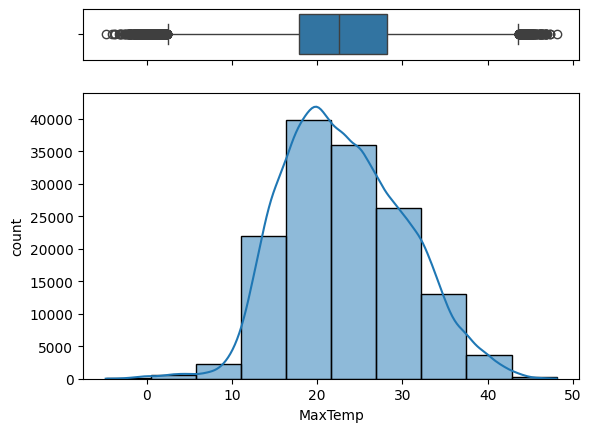

In [177]:

fig, (ax_box, ax_hist) = plt.subplots(2, 
                                    sharex = True, 
                                    gridspec_kw = {'height_ratios': (.15, .85)}) 
 
sns.boxplot(x = df_weather['MaxTemp'], ax = ax_box)
sns.histplot(x = df_weather['MaxTemp'], ax = ax_hist, bins = 10, kde = True)
 
ax_box.set(xlabel = '') 
ax_hist.set(xlabel = 'MaxTemp')
ax_hist.set(ylabel = 'count')
 

> Biểu đồ histogram xem tần suất cột "RainTomorrow" với hai giá tri Yes và No

<Axes: xlabel='RainTomorrow', ylabel='count'>

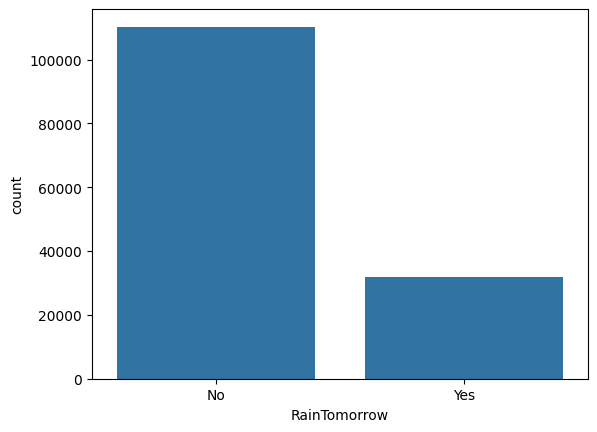

In [178]:
sns.countplot(x = 'RainTomorrow', data = df_weather)

#### 2.4.3. Line plot

> Kiểu dữ liệu của cột `Date` tháng hiện tại là object nên  sẽ chuyển đổi nó sang kiểu datetime để dễ dàng xử lý các ngày tháng. => Dễ dàng trong việc Trực quan hóa dữ liệu.

In [179]:
df_weather["Date"]=pd.to_datetime(df_weather["Date"])

df_weather["year"]=df_weather["Date"].dt.year
df_weather["month"]=df_weather["Date"].dt.month
df_weather["day"]=df_weather["Date"].dt.day

df_weather.drop("Date",axis=1,inplace=True)

<Axes: xlabel='day', ylabel='MinTemp'>

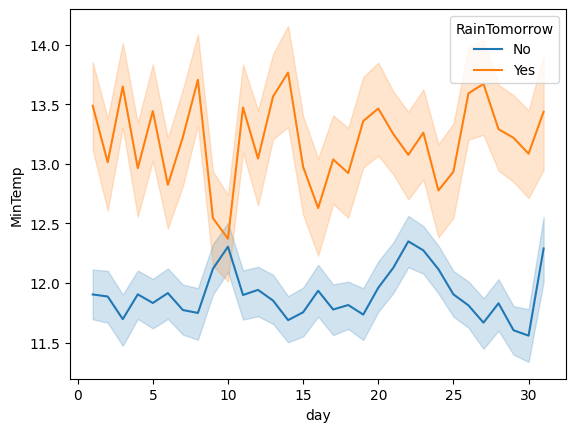

In [180]:
sns.lineplot(x="day",y="MinTemp",hue="RainTomorrow",data=df_weather)

<Axes: xlabel='day', ylabel='MaxTemp'>

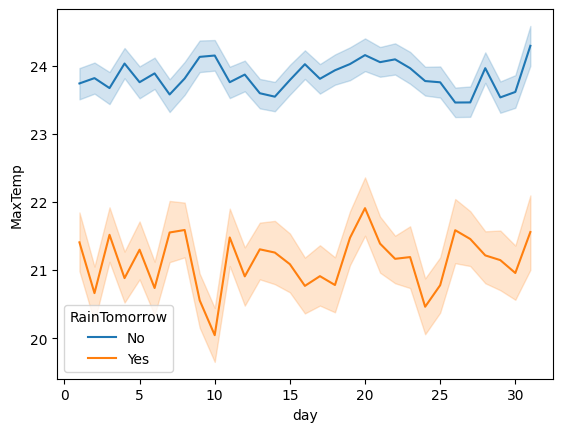

In [181]:
sns.lineplot(x="day",y="MaxTemp",hue="RainTomorrow",data=df_weather)

<Axes: xlabel='day', ylabel='None'>

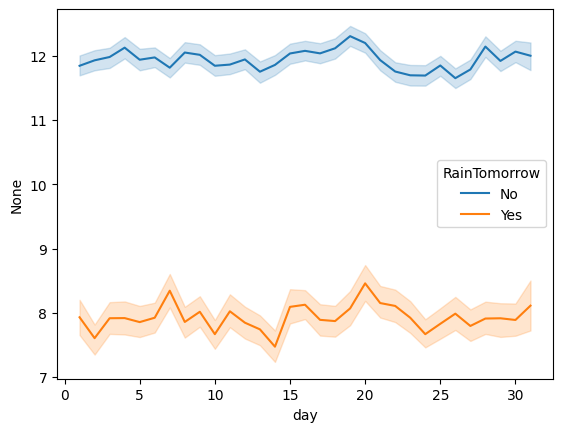

In [182]:
sns.lineplot(x=df_weather["day"],y=(df_weather["MaxTemp"]-df_weather["MinTemp"]),hue=df_weather["RainTomorrow"])

> => Từ đây ta thấy rằng có sự chênh lệnh giữa nhiệt độ

<Axes: xlabel='day', ylabel='Pressure3pm'>

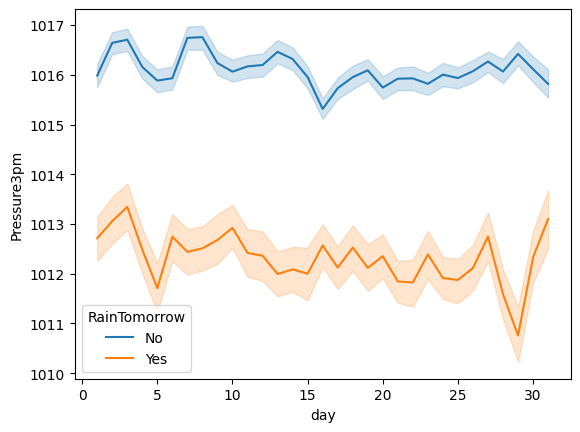

In [183]:
sns.lineplot(x=df_weather["day"],y=df_weather["Pressure3pm"],hue=df_weather["RainTomorrow"])

<Axes: xlabel='day', ylabel='Pressure9am'>

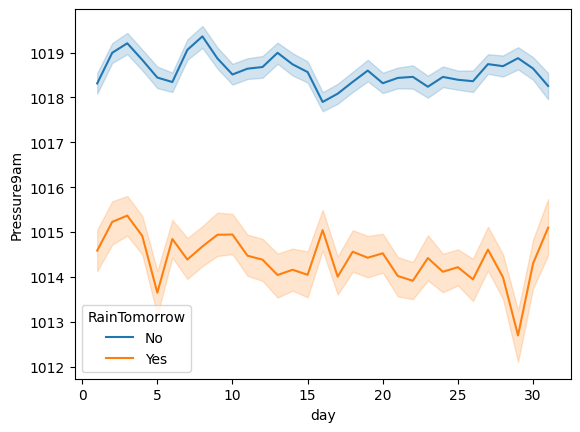

In [184]:
sns.lineplot(x=df_weather["day"],y=df_weather["Pressure9am"],hue=df_weather["RainTomorrow"])

<Axes: xlabel='day', ylabel='None'>

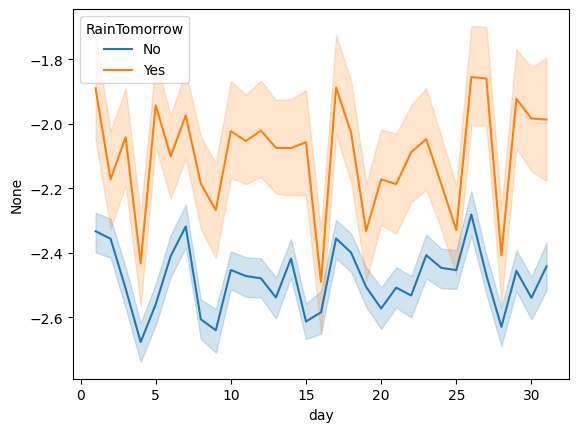

In [185]:
sns.lineplot(x=df_weather["day"],y=(df_weather["Pressure3pm"]-df_weather["Pressure9am"]),hue=df_weather["RainTomorrow"])

> => Nhưng đối với Pressure thì không có sự chênh klệch

#### 2.4.5. Boxplot

> chúng ta có thể thấy được outliers trong dataset

<Axes: xlabel='RainTomorrow', ylabel='Rainfall'>

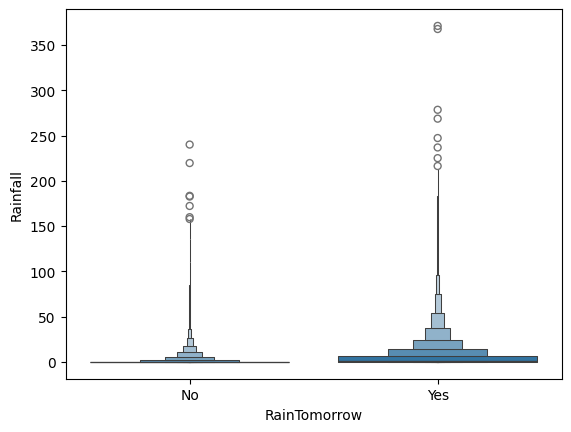

In [186]:
sns.boxenplot(y="Rainfall",x="RainTomorrow",data=df_weather)

<Axes: xlabel='RainTomorrow', ylabel='Evaporation'>

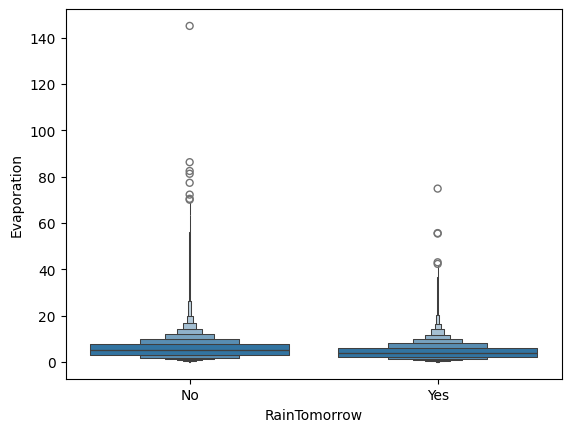

In [187]:
sns.boxenplot(y="Evaporation",x="RainTomorrow",data=df_weather)

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

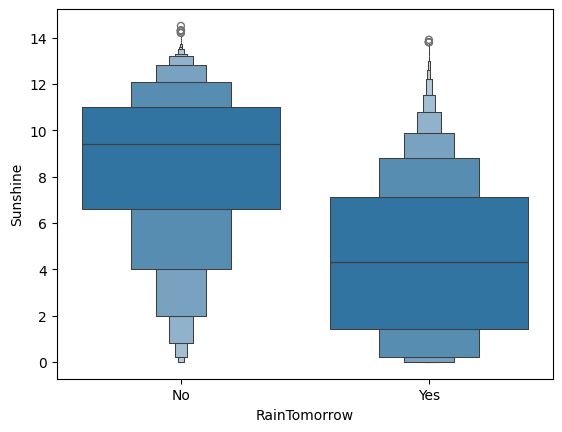

In [188]:
sns.boxenplot(y="Sunshine",x="RainTomorrow",data=df_weather)

<Axes: xlabel='RainTomorrow', ylabel='WindGustSpeed'>

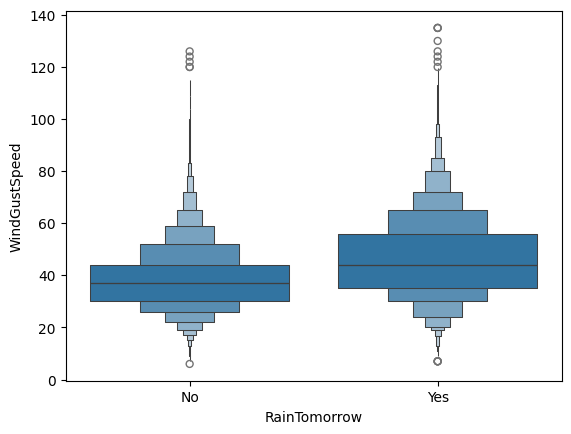

In [189]:
sns.boxenplot(y="WindGustSpeed",x="RainTomorrow",data=df_weather)

> => WindGustSpeed, Sunshine và Rainfall ảnh hưởng đến khả năng có mưa

### 2.5.Data Preprocessing

#### 2.5.1.Handle missing values

> Bây giờ chúng ta sẽ phân tích biến mục tiêu là `RainTomorrow`.

In [190]:
# Checking for the missing values in the target variable
df_weather['RainTomorrow'].isnull().sum()

3267

> `RainTomorrow` có 3267 giá trị bị thiếu. Vì `RainTomorrow` sẽ được phân loại. Vì vậy, chúng ta phải loại bỏ các hàng có giá trị bị thiếu.

In [191]:
# Droping the missing values
df_weather = df_weather.dropna(subset = ['RainTomorrow'])

> Check missing values

In [192]:
print(df_weather.isnull().sum())

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
year                 0
month                0
day                  0
dtype: int64


`Evaporation`, `Sunshine`, `Cloud9am` and `Cloud3pm` có các giá trị bị thiếu lớn, vì vậy trước tiên chúng ta xử lý các giá trị bị thiếu cho các tính năng này.

In [193]:
df_weather.drop(columns = ['Sunshine', 'Cloud9am', 'Cloud3pm','Evaporation'], axis = 1, inplace = True)

> Xử lí giá trị bị thiếu cho các biến phân loại

In [194]:
categorical_col = df_weather.select_dtypes('object').columns[:-1].to_list()
for col in categorical_col:
    df_weather[col].fillna(df_weather[col].mode()[0], inplace = True)
    df_weather[col].fillna(df_weather[col].mode()[0], inplace = True) 

> Các biến còn lại thì điền giá trị trung vị

In [195]:
# Removing the missing values from the remaining numerical features as they are <10%.
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for col in numeric_col:
    df_weather[col].fillna(df_weather[col].median(), inplace = True)
df_weather.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'year', 'month', 'day'],
      dtype='object')

> Xoá các cột year, month ,day

In [196]:
df_weather.drop(columns = ['year', 'month', 'day'], axis = 1, inplace = True)

> Xử lý giá trị ngoại lai => Sử dụng IQR

In [197]:
def remove_outliers_iqr(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

Before removing outliers: (142193, 18)
After removing outliers: (110246, 18)


> Sử dụng lên cột Rainfall và WinGustSpeed

In [ ]:
print("Before removing outliers:", df_weather.shape)
df_weather = remove_outliers_iqr(df_weather, 'Rainfall')
df_weather = remove_outliers_iqr(df_weather, 'WindGustSpeed')
print("After removing outliers:", df_weather.shape)

#### 2.5.2 Data standardization

> Bây giờ dữ liệu đã sẵn sàng để xử lý trước, hãy chuyển đổi các biến phân loại thành One Hot Encoding 

In [200]:
df_weather = pd.get_dummies(df_weather, drop_first = True).reset_index(drop = True)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110246 entries, 0 to 110245
Columns: 107 entries, MinTemp to RainTomorrow_Yes
dtypes: bool(95), float64(12)
memory usage: 20.1 MB


> Lấy các thuộc tính có giá trị liên tục

In [201]:
numeric_df = df_weather.select_dtypes(include=['float64', 'int64']).columns[:-1].to_list()
print(numeric_df)


['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am']


> Chuyển đổi các thuộc tính phân loại thành 0 / 1 

In [202]:
categorical_col = [i for i in df_weather.columns if i not in numeric_df]
print(categorical_col)
for col in categorical_col:
    df_weather[col] = df_weather[col].astype(int)

['Temp3pm', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Location_Witch

> Chuẩn hoá rời rạc theo phương pháp zscore

In [203]:
scalar=StandardScaler()
df_weather_scale = pd.DataFrame(scalar.fit_transform(df_weather[numeric_df]), columns = numeric_df) 

> Nối lại các thuộc tính kiểu dữ liệu số với các thuộc tính mang giá trị rời rạc

In [204]:
df_weather_final = pd.concat([df_weather_scale, df_weather[categorical_col]], axis = 1)

> Sự phân bố của biến mục tiêu

Text(0, 0.5, 'Count')

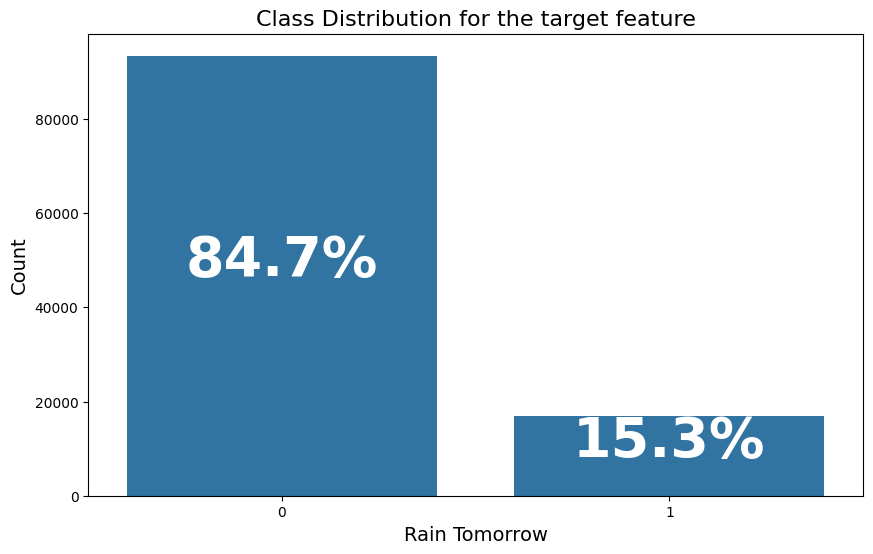

In [205]:
# Checking for the class imbalance
fig = plt.figure(figsize = (10, 6))
axis = sns.countplot(x = 'RainTomorrow_Yes', data = df_weather)
axis.set_title('Class Distribution for the target feature', size = 16)

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2,
            s = f"{np.round(patch.get_height()/len(df_weather)*100, 1)}%",
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'white')

axis.set_xlabel('Rain Tomorrow', size = 14)
axis.set_ylabel('Count', size = 14)

> Correlation between variables

[Text(0, 0.5, 'MinTemp'),
 Text(0, 1.5, 'MaxTemp'),
 Text(0, 2.5, 'Rainfall'),
 Text(0, 3.5, 'WindGustSpeed'),
 Text(0, 4.5, 'WindSpeed9am'),
 Text(0, 5.5, 'WindSpeed3pm'),
 Text(0, 6.5, 'Humidity9am'),
 Text(0, 7.5, 'Humidity3pm'),
 Text(0, 8.5, 'Pressure9am'),
 Text(0, 9.5, 'Pressure3pm'),
 Text(0, 10.5, 'Temp9am'),
 Text(0, 11.5, 'Temp3pm')]

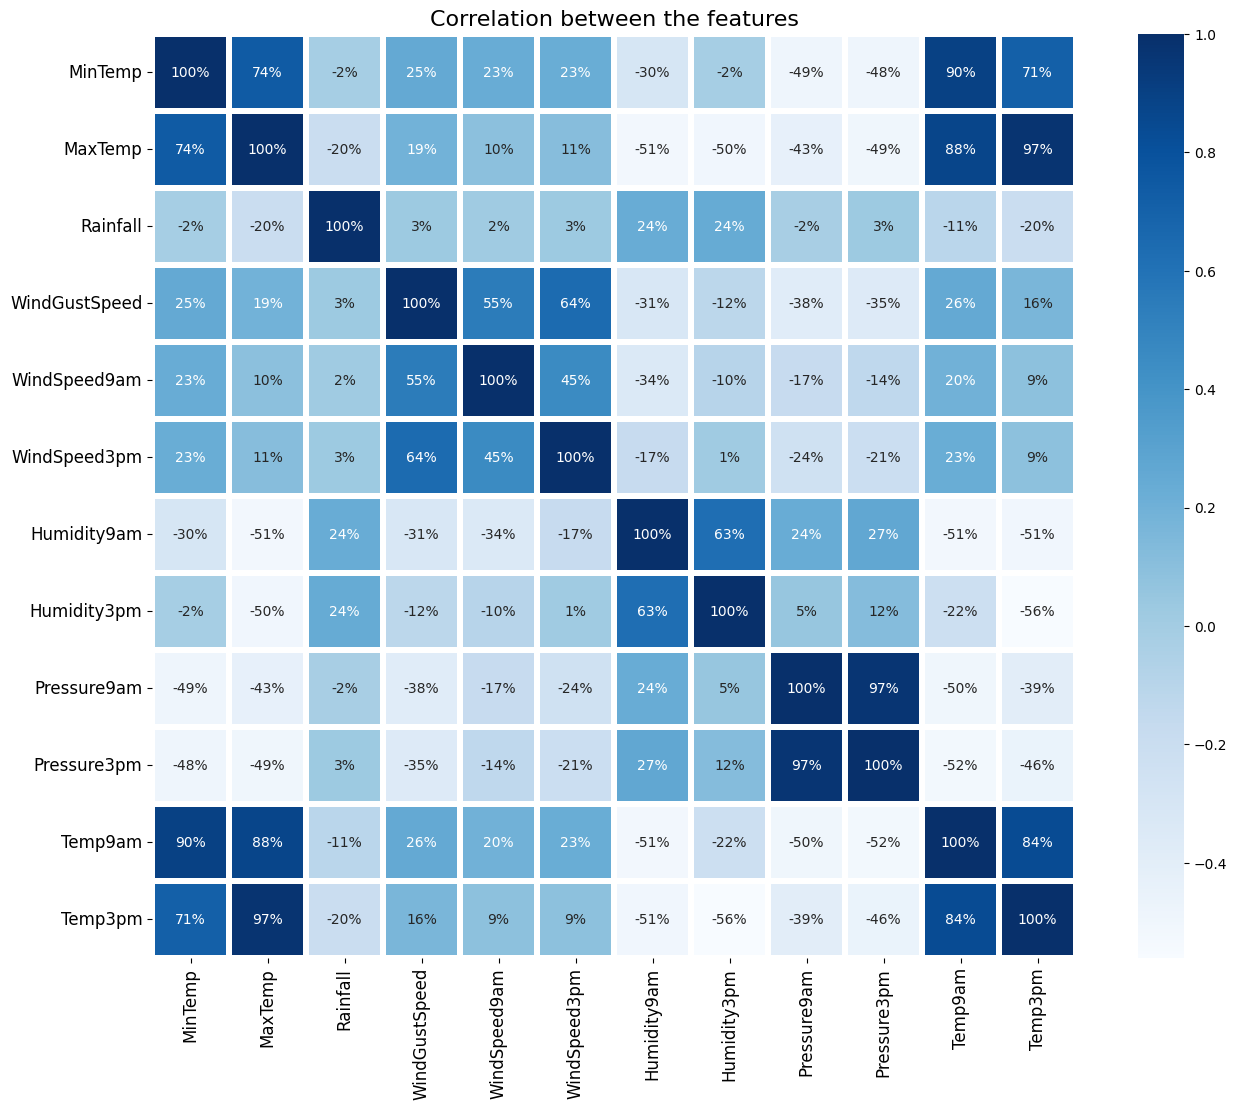

In [206]:
# Checking for the correlation between the numeric features
# Correlation between numeric variables
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(df_weather[numeric_col].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16)
axis.set_xticklabels(numeric_col, fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0)

> Tương quan chặt chẽ giữa

`Temp3pm` and `MaxTemp`

`Pressure3pm` and `Pressure9am`

`Temp9am` and `MinTemp`

`Temp9am` and `MaxTemp`

`Temp3pm` and `Temp9am`

> Chúng ta sẽ loại bỏ một trong các đặc điểm trong mỗi cặp để tránh hiện tượng đa cộng tuyến

In [207]:
columns_to_drop = ['Temp3pm', 'Pressure3pm', 'Temp9am']
df_weather_final.drop(columns=columns_to_drop, inplace=True)
df_weather_final.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Location_Albany',
       ...
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object', length=104)

## 3. Building an artificial neural network model regression problem

### 3.1. Divide data into training set and test set

In [208]:
x_train, x_test, y_train, y_test = train_test_split(df_weather_final.drop(columns=['MaxTemp']), 
                                                    df_weather_final['MaxTemp'], 
                                                    test_size=0.2, 
                                                    random_state=42)

### 3.2 Model FNN for Maximum temperature prediction

In [209]:
# Creating the FNN
model = Sequential()
model.add(Dense(units=8, activation='relu', name='layer_1'))
model.add(Dense(units=8, activation='relu', name='layer_2'))
model.add(Dense(units=8, activation='relu', name='layer_3'))
model.add(Dense(units=1))


### 3.3 Train FNN for regression problem

In [210]:
# Compiling the FNN
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])
# Fitting the FNN to the Training set
model.fit(x_train, y_train, epochs=32, verbose=1)

Epoch 1/32
2757/2757 [==============================] - 5s 1ms/step - loss: 0.5863 - mse: 0.5863
Epoch 2/32
2757/2757 [==============================] - 4s 2ms/step - loss: 0.1925 - mse: 0.1925
Epoch 3/32
2757/2757 [==============================] - 4s 1ms/step - loss: 0.1517 - mse: 0.1517
Epoch 4/32
2757/2757 [==============================] - 3s 1ms/step - loss: 0.1405 - mse: 0.1405
Epoch 5/32
2757/2757 [==============================] - 4s 1ms/step - loss: 0.1346 - mse: 0.1346
Epoch 6/32
2757/2757 [==============================] - 4s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 7/32
2757/2757 [==============================] - 4s 2ms/step - loss: 0.1274 - mse: 0.1274
Epoch 8/32
2757/2757 [==============================] - 4s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 9/32
2757/2757 [==============================] - 4s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 10/32
2757/2757 [==============================] - 4s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 11/32
2757/2757 [======

### 3.4. Model Summary

In [211]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 8)                 832       
                                                                 
 layer_2 (Dense)             (None, 8)                 72        
                                                                 
 layer_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 985 (3.85 KB)
Trainable params: 985 (3.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.5 Predicting 

In [212]:
result=model.predict(x_test)

  1/690 [..............................] - ETA: 58s

690/690 [==============================] - 1s 1ms/step


### 3.6. Evaluating

In [213]:
print(f"MSE:{mean_squared_error(y_test,result)} ")

MSE:0.10833221641349555 


## 4. Building an artificial neural network model classification problem

### 4.1. Divide data into training set and test set

In [214]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(df_weather_final.drop(columns=['RainTomorrow_Yes']), 
                                                    df_weather_final['RainTomorrow_Yes'], 
                                                    test_size=0.2, 
                                                    random_state=42)

### 4.2 Model FNN for RainTomorrow classification

In [215]:
# Creating the FNN
model_class = Sequential()

model_class.add(Dense(units=8, activation='relu', name='layer_1'))
model_class.add(Dense(units=8, activation='relu', name='layer_2'))
model_class.add(Dense(units=8, activation='relu', name='layer_3'))
model_class.add(Dense(units=8, activation='relu', name='layer_4'))
model_class.add(Dense(units=1, activation='sigmoid'))

### 4.3 Train FNN for classification problem

In [216]:
# Compile model
model_class.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model_class.fit(x_train_class, y_train_class, epochs=30)

Epoch 1/30
2757/2757 [==============================] - 5s 1ms/step - loss: 0.4030 - accuracy: 0.8478
Epoch 2/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3435 - accuracy: 0.8516
Epoch 3/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3310 - accuracy: 0.8677
Epoch 4/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3248 - accuracy: 0.8704
Epoch 5/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3213 - accuracy: 0.8719
Epoch 6/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3188 - accuracy: 0.8732
Epoch 7/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3171 - accuracy: 0.8742
Epoch 8/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.3156 - accuracy: 0.8751
Epoch 9/30
2757/2757 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8752
Epoch 10/30
2757/2757 [==============================] - 4s 1ms/step - loss: 0.313

### 4.4. Model Summary

In [217]:
model_class.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 8)                 832       
                                                                 
 layer_2 (Dense)             (None, 8)                 72        
                                                                 
 layer_3 (Dense)             (None, 8)                 72        
                                                                 
 layer_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.5 Classifying

In [218]:
loss, accuracy = model_class.evaluate( x_test_class, y_test_class)

690/690 [==============================] - 1s 958us/step - loss: 0.3084 - accuracy: 0.8759


### 4.6. Evaluating

In [219]:
# print(f"Loss trên dữ liệu kiểm tra: {loss}")
# print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy}")
print(f"Loss trên dữ liệu kiểm tra: {loss}")
print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy}")

Loss trên dữ liệu kiểm tra: 0.30836227536201477
Độ chính xác trên dữ liệu kiểm tra: 0.8759183883666992
